In [2]:
import pandas
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
train = pandas.read_csv('../data/training_input.csv', usecols=['bid_1', 'ask_1', 'offset'])

Distribution des valeurs du bid (train)
-------------------------------

/home/nath/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


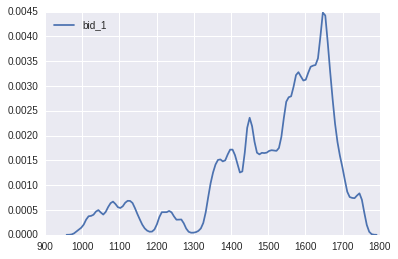

In [3]:
sns.kdeplot(train.bid_1)

Distribution des valeurs du ask (train)
-------------------------------

/home/nath/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


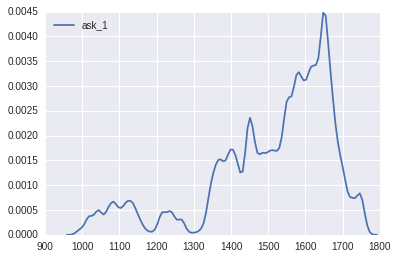

In [4]:
sns.kdeplot(train.ask_1)

Distribution des valeurs du spread (train)
----------------------------------

In [5]:
train['spread'] = train['ask_1'] - train['bid_1']

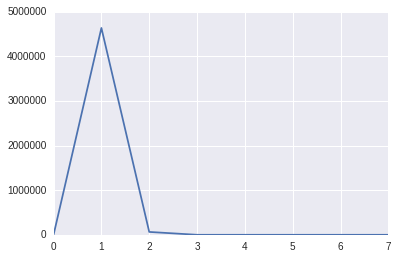

In [6]:
plt.plot(np.bincount(train['spread'].astype(int)))

Evolution du Bid (train)
---

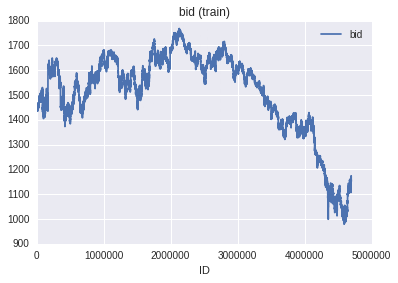

In [3]:
plt.figure(figsize=(6, 4))
plt.plot(train.bid_1)
plt.legend(['bid'])
plt.xlabel('ID')
plt.title('bid (train)')

Evolution du Ask
---

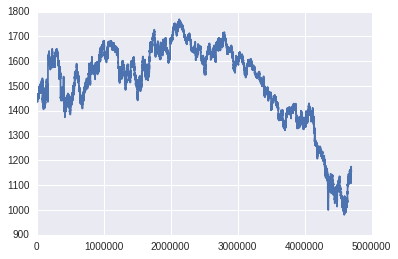

In [8]:
plt.plot(train.ask_1)

Evolution du Spread (train)
------

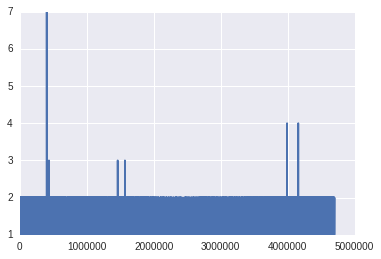

In [9]:
plt.plot(train.spread)

In [2]:
test = pandas.read_csv('../data/testing_input.csv', usecols=['bid_1', 'ask_1', 'offset'])

Distribution des valeurs du bid (test)
-------------------------------

/home/nath/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


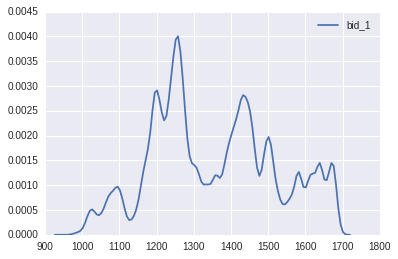

In [11]:
sns.kdeplot(test.bid_1)

Distribution des valeurs du ask (test)
-------------------------------

/home/nath/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


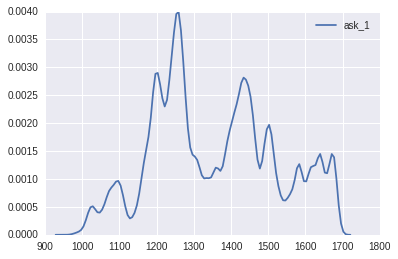

In [12]:
sns.kdeplot(test.ask_1)

Distribution des valeurs du spread (test)
----------------------------------

In [13]:
test['spread'] = test['ask_1'] - test['bid_1']

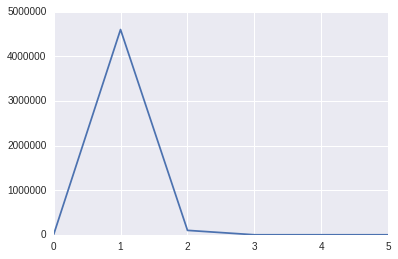

In [14]:
plt.plot(np.bincount(test['spread'].astype(int)))

Evolution du Bid (test)
---

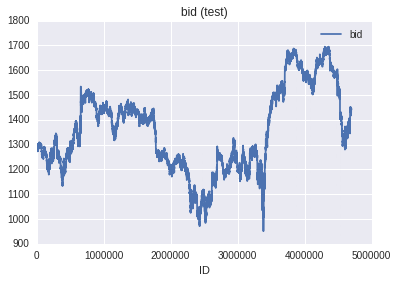

In [3]:
plt.figure(figsize=(6, 4))
plt.plot(test.bid_1)
plt.ylim([900, 1800])
plt.legend(['bid'])
plt.xlabel('ID')
plt.title('bid (test)')

Evolution du Ask (test)
---

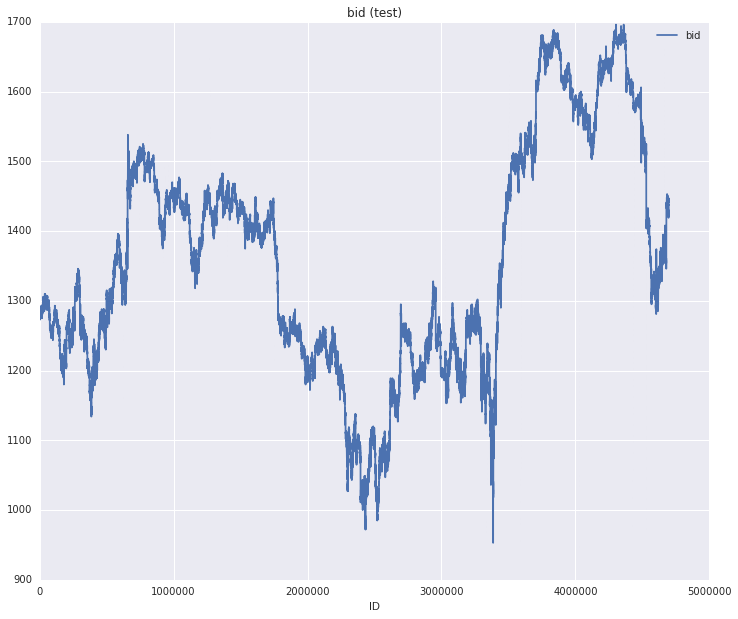

In [40]:
plt.figure(figsize=(12, 10))
plt.plot(test.ask_1)
plt.legend(['bid'])
plt.xlabel('ID')
plt.title('bid (test)')

Evolution du Spread (test)
------

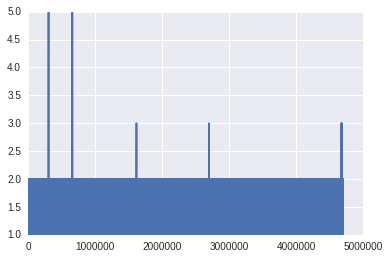

In [17]:
plt.plot(test.spread)

Standard deviation with respect to the offset
---------------------------------------------

In [4]:
std = [np.linalg.norm(train['bid_1'].diff(period+1)[7::8].values) for period in range(7)]

In [5]:
std

[32.480763537823428,
 42.614551505325032,
 63.804388563797083,
 86.284413424441851,
 114.89560478973945,
 167.47238578344789,
 220.83025155082353]

In [6]:
offsets = -train.loc[:6,'offset'].values[::-1]

In [7]:
offsets

array([  10,   20,   50,  100,  200,  500, 1000], dtype=int64)

(array([  10,   20,   50,  100,  200,  500, 1000], dtype=int64),
 <a list of 7 Text xticklabel objects>)

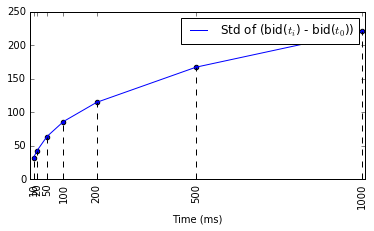

In [11]:
plt.figure(figsize=(6,3))
plt.plot(offsets, std)
plt.scatter(offsets, std)
plt.vlines(offsets, ymin=[0, 0, 0, 0, 0, 0, 0], ymax=std, linestyles='dashed')
plt.xlim(0, 1010)
plt.ylim(0, 250)
plt.xticks(offsets)
plt.xlabel('Time (ms)')
plt.legend(['Std of (bid($t_i$) - bid($t_0$))'])
plt.xticks(rotation=90)

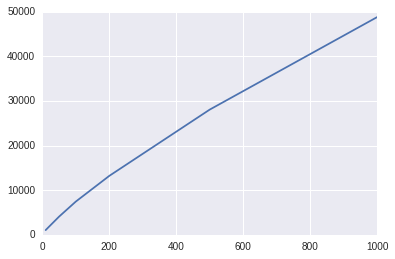

In [24]:
plt.plot(offsets, [x*x for x in std]

Standard deviation between two epochs
-------------------------------------

In [25]:
np.linalg.norm(train['bid_1'].diff(8)[7+8::8].values)

604.84460814328168

Estimation du temps entre deux epochs
-------------------------------------

In [47]:
1000*604.844608143**2 / 220.83025155082353**2

7501.886560301423

Evolution de la valeur absolue de la différence du bid entre 2 epochs
---------------------------------------------------------------------

In [14]:
diff = np.abs(train['bid_1'].diff(8)[7+8::8].values)

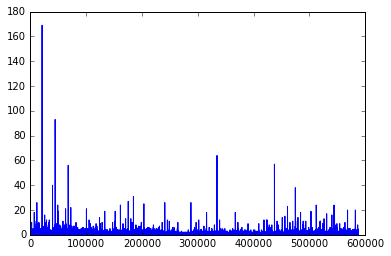

In [15]:
plt.plot(diff)

Autocorrélation
---------------

In [16]:
from pandas.tools.plotting import autocorrelation_plot

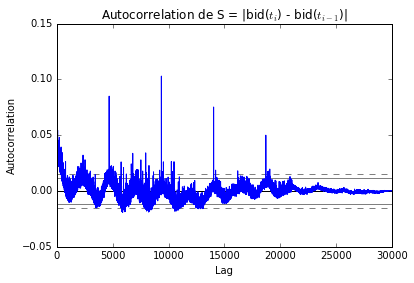

In [19]:
plt.figure(figsize=(6,4))
autocorrelation_plot(diff[:30000])
plt.ylim(-0.05, 0.15)
plt.title('Autocorrelation de S = |bid($t_i$) - bid($t_{i-1}$)|')  
plt.grid()

Calcul du nombre d'epochs par jour
----------------------------------

In [31]:
def acf(series):
    n = len(series)
    data = np.asarray(series)
    mean = np.mean(data)
    c0 = np.sum((data - mean) ** 2) / float(n)

    def r(h):
        acf_lag = ((data[:n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0
        return round(acf_lag, 3)
    x = np.arange(n) # Avoiding lag 0 calculation
    apply = np.vectorize(r)
    acf_coeffs = apply(x)
    return acf_coeffs

In [32]:
diff_acf = acf(diff[:30000])

In [33]:
(-diff_acf).argsort()[:10]

array([    0,  9358,  4679,     1,     2, 14037,    19,     8,     3,     6], dtype=int32)

In [34]:
peaks = [0, 4679, 9358, 14037]

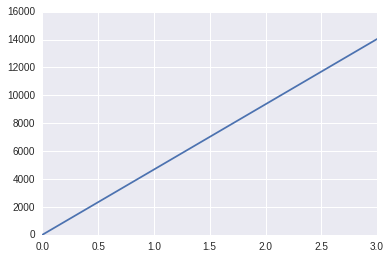

In [35]:
plt.plot(peaks)

In [36]:
14037/3

4679.0

Estimation du nombre d'heures dans une journée pour lesquelles on a des donnéees
-----------------------------

In [37]:
7.614*4679/3600

9.896085000000001

Estimation du temps entre 2 epochs (test)
---------------

In [38]:
std = [np.linalg.norm(test['bid_1'].diff(period+1)[7::8].values) for period in range(7)]

In [39]:
offsets = -test.loc[:6,'offset'].values[::-1]

In [40]:
std

[36.055512754639892,
 47.581509013481273,
 70.34912934784623,
 93.66429415737889,
 123.21120078953861,
 177.94100145834855,
 235.13825720201297]

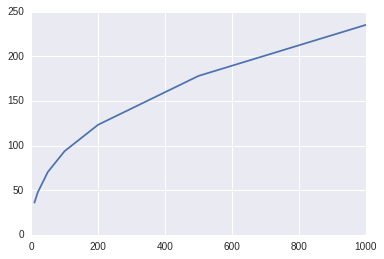

In [41]:
plt.plot(offsets, std)

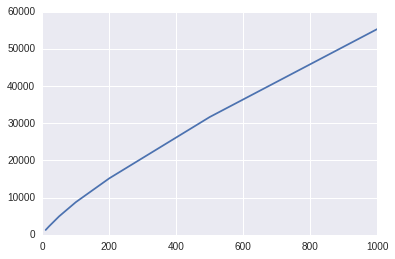

In [42]:
plt.plot(offsets, [x*x for x in std])

In [43]:
P=np.polyfit([x*x for x in std], offsets, 1)

In [44]:
np.poly1d(P)(646.448760537**2)

7614.4545575612383

Estimation du nombre de journées (train)
---------------

In [45]:
train.shape[0]/8/4679

125.49989313955973

Estimation du nombre de journées (test)
--------------------------------------

In [46]:
test.shape[0]/8/4679

125.50010686044027